In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 24.1 MB/s eta 0:00:00


In [3]:
!uv pip install fastparquet

Using Python 3.13.7 environment at: /home/ezamorag/miniconda3/envs/raul
Resolved 10 packages in 359ms                                        
Prepared 2 packages in 129ms                                             
Installed 2 packages in 10ms0                               
 + cramjam==2.11.0
 + fastparquet==2024.11.0


In [1]:
import matplotlib.pyplot as plt

def eda(Xt, Yt, Xtest, Ytest):
    print(Xt.shape, Yt.shape)
    print(Xtest.shape, Ytest.shape)

    print(Xt.dtype, Yt.dtype)
    print(Xtest.dtype, Ytest.dtype)

    plt.figure(figsize=(7,2))
    plt.subplot(121)
    plt.hist(Yt)
    plt.subplot(122)
    plt.hist(Ytest)
    plt.show()

    print('clase, Ytest/Yt, Nt, Ntest')
    for i in range(5):
        strain, stest = (Yt == i).sum(), (Ytest == i).sum()
        p = round(stest/strain, 4)
        print(i, p, strain, stest)

    print()
    print('statistics')
    print(Xt.mean(), Xt.std(), Xt.min(), Xt.max())
    print(Xtest.mean(), Xtest.std(), Xtest.min(), Xtest.max())

import sklearn as sk
from mlxtend.evaluate import accuracy_score


In [2]:
import pandas as pd

df = pd.read_parquet('cic-collection.parquet')

# Label 33
# ClassLabel 8
# 57 features
# Total examples 9167581

In [3]:
df.head(20)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,ClassLabel
0,4,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
1,1,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
2,3,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,1,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
4,609,7,4,484.0,414.0,233.0,69.142860,111.967896,207.0,103.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
5,879,9,4,656.0,3064.0,313.0,72.888885,136.153809,1532.0,766.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
6,1160,9,6,3134.0,3048.0,1552.0,348.222229,682.482544,1518.0,508.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
7,524,7,4,2812.0,2820.0,1397.0,401.714294,679.914856,1410.0,705.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
8,6,1,1,6.0,6.0,6.0,6.000000,0.000000,6.0,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
9,1119,9,6,3160.0,3060.0,1565.0,351.111115,688.214966,1524.0,510.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [4]:
# Normalizar en df: cada columna (feature) usando su media y desviación estándar,
# excepto las últimas dos columnas (clases).
feature_cols = df.columns[:-2]  # todas las columnas salvo las dos últimas (Label, ClassLabel)

means = {}
stds = {}

for col in feature_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        mu = df[col].mean()
        sigma = df[col].std()
        means[col] = mu
        stds[col] = sigma
        # Evitar división por cero: si sigma==0 (columna constante) centramos y dejamos ceros
        if sigma == 0 or pd.isna(sigma):
            df[col] = df[col] - mu
        else:
            df[col] = (df[col] - mu) / sigma
    else:
        # Si hubiera columnas no numéricas entre las features, se dejan sin tocar
        means[col] = None
        stds[col] = None


In [5]:
df.head(20)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,ClassLabel
0,-0.024212,-0.018775,-0.016372,-0.024548,-0.007813,-0.575259,-0.529219,-0.524278,-0.514233,-0.528057,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
1,-0.024212,-0.018775,-0.016372,-0.024548,-0.007813,-0.575259,-0.529219,-0.524278,-0.514233,-0.528057,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
2,-0.024212,-0.018775,-0.016372,-0.024548,-0.007813,-0.575259,-0.529219,-0.524278,-0.514233,-0.528057,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
3,-0.024212,-0.018775,-0.016372,-0.024548,-0.007813,-0.575259,-0.529219,-0.524278,-0.514233,-0.528057,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
4,-0.024211,-0.016355,-0.009483,-0.018901,-0.007490,-0.122936,-0.085304,0.038410,-0.338888,-0.255182,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
5,-0.024211,-0.015388,-0.009483,-0.016843,-0.005422,0.036473,-0.058969,0.159955,0.783495,1.491486,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
6,-0.024210,-0.015388,-0.006038,0.012803,-0.005434,2.505320,1.876713,2.905497,0.771635,0.811274,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
7,-0.024211,-0.016355,-0.009483,0.008951,-0.005612,2.196465,2.252779,2.892593,0.680151,1.330661,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
8,-0.024212,-0.019259,-0.014650,-0.024619,-0.007808,-0.575259,-0.529219,-0.524278,-0.509151,-0.512239,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign
9,-0.024210,-0.015388,-0.006038,0.013114,-0.005425,2.531224,1.897023,2.934304,0.776718,0.816547,...,-0.079074,-0.064595,-0.097397,-0.065099,-0.022877,-0.002439,-0.010545,-0.087599,Benign,Benign


In [6]:
means, stds

({'Flow Duration': np.float64(15906685.544299526),
  'Total Fwd Packets': np.float64(40.79504986102659),
  'Total Backward Packets': np.float64(9.505221388281162),
  'Fwd Packets Length Total': np.float64(2063.8254852615974),
  'Bwd Packets Length Total': np.float64(10010.843275341664),
  'Fwd Packet Length Max': np.float64(294.6959594902952),
  'Fwd Packet Length Mean': np.float32(81.276634),
  'Fwd Packet Length Std': np.float32(104.32479),
  'Bwd Packet Length Max': np.float64(607.0652258212936),
  'Bwd Packet Length Mean': np.float32(200.28883),
  'Bwd Packet Length Std': np.float32(240.98698),
  'Flow Bytes/s': np.float64(2854875.5219017905),
  'Flow Packets/s': np.float64(11029.195097370291),
  'Flow IAT Mean': np.float32(4.5776105e+06),
  'Flow IAT Std': np.float32(2.389905e+06),
  'Flow IAT Max': np.float64(10513160.456782766),
  'Flow IAT Min': np.float64(2752751.8851836706),
  'Fwd IAT Total': np.float64(15304171.138269518),
  'Fwd IAT Mean': np.float32(5.135344e+06),
  'Fwd 

In [7]:
from joblib import load
import numpy as np
from sklearn.utils import shuffle
import sklearn.model_selection

X = df.iloc[:, :-2].to_numpy()
# Convertir la columna 'Label' a enteros empezando en 0
Y, uniques = pd.factorize(df['Label'])
label_to_int = {lab: int(i) for i, lab in enumerate(uniques)}
int_to_label = {int(i): lab for i, lab in enumerate(uniques)}
Xt, Xtest, Yt, Ytest = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [8]:
Xt.shape, Yt.shape, Xtest.shape, Ytest.shape

((7334064, 57), (7334064,), (1833517, 57), (1833517,))

(7334064, 57) (7334064,)
(1833517, 57) (1833517,)
float64 int64
float64 int64


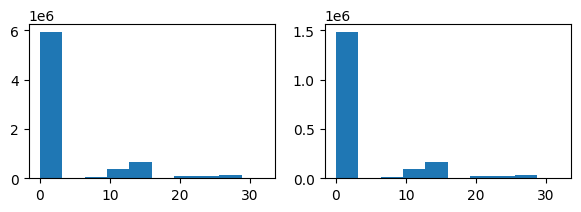

clase, Ytest/Yt, Nt, Ntest
0 0.25 5748951 1437238
1 0.25 116774 29194
2 0.2501 4787 1197
3 0.25 77808 19452
4 0.2495 497 124

statistics
1.4625387971015613e-05 0.9992740385618605 -2793.1787109375 2834.9769235356807
-5.848929462551343e-05 1.0028983003645635 -1398.9004603570227 1128.9873046875


In [12]:
eda(Xt, Yt, Xtest, Ytest)

In [10]:
### Methods to reduce dataset size

def rss(Xtrain, Ytrain, size, clf):
    """ Random Selection Strategy """
    indices = np.random.choice(len(Xtrain), size=size, replace=False)
    x, y = Xtrain[indices], Ytrain[indices]
    clf.fit(x, y)
    return x, y, clf

def rss_xgboost(Xtrain, Ytrain, size, clf):
    """ Random Selection Strategy """
    Xt_shuffled, Yt_shuffled = shuffle(Xtrain, Ytrain)
    _, unique_indices = np.unique(Yt_shuffled, return_index=True)
    x0, y0 = Xt_shuffled[unique_indices], Yt_shuffled[unique_indices]

    indices = np.random.choice(len(Xtrain), size=size, replace=False)
    x = np.concatenate([x0, Xtrain[indices]])
    y = np.concatenate([y0, Ytrain[indices]])
    clf.fit(x, y)
    return x, y, clf

def addOnlyErrors(Xtrain, Ytrain, batch_size, n_epochs, clf):
    """ Selection strategy based on adding only errors """
    # Initialization
    Xt_shuffled, Yt_shuffled = shuffle(Xtrain, Ytrain)
    _, unique_indices = np.unique(Yt_shuffled, return_index=True)
    x, y = Xt_shuffled[unique_indices], Yt_shuffled[unique_indices]
    clf.fit(x, y)
    for _ in range(n_epochs):
        Xt_shuffled, Yt_shuffled = shuffle(Xtrain, Ytrain)
        for i in tqdm(range(0, len(Xt_shuffled), batch_size)):
            # Add errors of the next batch
            dx, dy = Xt_shuffled[i:i+batch_size], Yt_shuffled[i:i+batch_size]
            dypred = clf.predict(dx)
            x = np.concatenate([x, dx[dypred != dy, :]])
            y = np.concatenate([y, dy[dypred != dy]])
            clf.fit(x, y)
    return x, y, clf

import time
import pandas as pd
from IPython.display import display
from tqdm.notebook import tqdm
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
#from tabpfn import TabPFNClassifier
#from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score

class CatBoostClassifierv2(CatBoostClassifier):
    def predict(self, x):
        y = super().predict(x)
        return np.squeeze(y)

clfs = {'dtree': lambda seed: DecisionTreeClassifier(random_state=seed),
        'svm': lambda seed: svm.SVC(random_state=seed),
        'xgboost': lambda seed: XGBClassifier(seed=seed),
        'randomforest': lambda seed: RandomForestClassifier(random_state=seed, verbose=0, n_jobs=-1),
        'catboost': lambda seed: CatBoostClassifierv2(random_state=seed, verbose=0),
        #'mlp': lambda seed: MLPClassifier(random_state=seed, max_iter=300),
        'tabpfn': lambda seed: TabPFNClassifier(random_state=seed),  # Debo limitar el nuero de instacias < 10000
        #'autotabpfn': lambda seed: AutoTabPFNClassifier(random_state=seed, max_time=30, device="cuda"),  # Debo limitar el nuero de instacias < 10000
}

In [11]:
bs_values = [10000] # [100, 1000, 10000, 100000, 1000000]
Nseeds = 1
n_epochs = 1
clflabels = ["randomforest"] #["dtree", "svm", "randomforest", "xgboost"]

outdir = f"outputs/"
Path(outdir).mkdir(parents=True, exist_ok=True)
columns = ["f1-aoe", "f1-c", "f1-rss", "t-aoe", "t-c", "t-rss", "Nds-aoe"]
# aoe: addonlyerrors, c: complete, rss: random selection strategy
# t: training time, f1: f1-score macro, Nds: dataset size, bs: batch size
for clflabel in clflabels:
    stats = pd.DataFrame(bs_values, columns=["bs"])
    for column in columns:
        stats[column + " (m)"] = None
    for column in columns:
        stats[column + " (s)"] = None

    for irow, row in stats.iterrows():
        metrics = {column: [] for column in columns}
        for _ in range(Nseeds):

            # Add Only Errors Strategy
            x0 = time.time()
            xr, yr, clf_aoe = addOnlyErrors(Xt, Yt, row["bs"], n_epochs, clfs[clflabel](seed=None))
            metrics["t-aoe"].append(time.time()-x0)
            Ypred = clf_aoe.predict(Xtest)
            metrics["f1-aoe"].append(f1_score(Ytest, Ypred, average='macro'))
            metrics["Nds-aoe"].append(xr.shape[0])
            del clf_aoe

            print(geometric_mean_score(Ytest, Ypred, average=None))

            # Complete dataset
            clf_c = clfs[clflabel](seed=None)
            x0 = time.time()
            clf_c.fit(Xt, Yt)
            metrics["t-c"].append(time.time()-x0)
            Ypred = clf_c.predict(Xtest)
            metrics["f1-c"].append(f1_score(Ytest, Ypred, average='macro'))
            del clf_c

            print(geometric_mean_score(Ytest, Ypred, average=None))

            # Random Selection Strategy
            if clflabel == "xgboost":
                x0 = time.time()
                _, _, clf_rss = rss_xgboost(Xt, Yt, xr.shape[0], clfs[clflabel](seed=None))
                metrics["t-rss"].append(time.time()-x0)
            else:
                x0 = time.time()
                _, _, clf_rss = rss(Xt, Yt, xr.shape[0], clfs[clflabel](seed=None))
                metrics["t-rss"].append(time.time()-x0)
            Ypred = clf_rss.predict(Xtest)
            metrics["f1-rss"].append(f1_score(Ytest, Ypred, average='macro'))
            del clf_rss

            print(geometric_mean_score(Ytest, Ypred, average=None))

        metrics_df = pd.DataFrame.from_dict(metrics)
        stats.iloc[irow] = [row["bs"]] + metrics_df.mean().tolist() + metrics_df.std().tolist()

    print(f"Results for {clflabel} classifier:")
    stats.to_csv(outdir + f"{clflabel}.csv", index=False)
    display(stats)

  0%|          | 0/734 [00:00<?, ?it/s]

[0.96927649 0.99635277 0.99748705 0.9997645  0.96720204 0.97728952
 0.99999973 0.99831239 0.98318752 0.89839954 0.99920553 0.97825427
 0.99949911 0.99949488 0.95407488 0.99938046 0.76886363 0.99208623
 0.97597988 0.70710678 0.42665174 0.75611702 0.82550856 0.94879188
 0.99816967 0.94174729 0.83500331 0.99562468 0.99871079 0.88432695
 0.81596446 0.70910545 0.70710562]
[0.97324409 0.99565409 0.99623025 0.99966579 0.95461449 0.96992317
 0.99999973 0.99851367 0.9785572  0.88640381 0.99850343 0.98646515
 0.99966392 0.99940419 0.98259459 0.99916686 0.78728196 0.99637729
 0.98757527 0.70710678 0.2626662  0.77949072 0.87769955 0.98110533
 0.99877087 0.93347853 0.87562364 0.99473672 0.99880356 0.87869316
 0.84429402 0.59520882 0.63245484]
[0.97253303 0.99344462 0.99076639 0.99781192 0.73506518 0.92539866
 0.98075293 0.99264803 0.91783371 0.79731475 0.99592064 0.96022521
 0.99893772 0.99824701 0.97736105 0.99792042 0.65919589 0.98826531
 0.97791706 0.         0.23192779 0.74334571 0.83885722 0.9

,bs,f1-aoe (m),f1-c (m),f1-rss (m),t-aoe (m),t-c (m),t-rss (m),Nds-aoe (m),f1-aoe (s),f1-c (s),f1-rss (s),t-aoe (s),t-c (s),t-rss (s),Nds-aoe (s)
0,10000,0.846084,0.861647,0.778763,2212.473981,593.909385,4.331347,201553.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import shutil


carpeta_origen = "/content/outputsv3/"
archivo_zip_salida = f"/content/outputsv3"
shutil.make_archive(archivo_zip_salida, 'zip', carpeta_origen)

print(f"Archivo ZIP creado: {archivo_zip_salida}.zip")
from google.colab import files
files.download(f"{archivo_zip_salida}.zip")

Archivo ZIP creado: /content/outputsv3.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>